1. Define Libraries

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.optimize import minimize
from mapping_tickers import *

2. Define Tickers

In [2]:
yt_example_tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']
"""
SPY:    SPDR S&P 500 ETF Trust
BND:    Vanguard Total Bond Market Index Fund
GLD:    SPDR Gold Shares
QQQ:    Invesco QQQ Trust
VTI:    Vanguard Total Stock Market Index Fund ETF Shares
"""

three_month_treasury_ticker = '^IRX'
# 13 WEEK TREASURY BILL
ten_year_treasury_ticker = '^TNX'
# CBOE Interest Rate 10 Year Treasury Note

crypto_tickers = ['BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'SOL-USD', 'USDC-USD', 'XRP-USD', 'TON-USD', 'DOGE-USD', 'ADA-USD', 'TRX-USD', 'AVAX-USD', 'SHIB-USD', 'DOT-USD', 'LINK-USD',
    'BCH-USD', 'DAI-USD', 'LEO-USD', 'NEAR-USD', 'MATIC-USD', 'UNI7083-USD', 'LTC-USD', 'KAS-USD', 'PEPE24478-USD', 'ICP-USD', 'ETC-USD', 'FET-USD', 'XMR-USD', 'APT-USD', 'XLM-USD', 'RNDR-USD',
    'HBAR-USD', 'ATOM-USD', 'CRO-USD', 'OKB-USD', 'FIL-USD', 'ARB11841-USD', 'MNT27075-USD', 'MKR-USD', 'STX4847-USD', 'FDUSD-USD', 'VET-USD', 'IMX10603-USD', 'INJ-USD', 'SUI20947-USD',
    'WIF-USD', 'GRT6719-USD', 'NOT-USD', 'TAO22974-USD', 'OP-USD']
"""
Top 50 by market cap (current price x circulating amount)
BTC-USD:        Bitcoin USD
ETH-USD:        Ethereum USD
USDT-USD:       Tether USD
BNB-USD:        BNB USD
SOL-USD:        Solana USD
USDC-USD:       USDC USD
XRP-USD:        XRP USD
TON-USD:        Tokamak Network USD
DOGE-USD:       Dogecoin USD
ADA-USD:        Cardano USD
TRX-USD:        TRON USD
AVAX-USD:       Avalanche USD
SHIB-USD:       Shiba Inu USD
DOT-USD:        Polkadot USD
LINK-USD:       Chainlink USD
BCH-USD:        Bitcoin Cash USD
DAI-USD:        Dai USD
LEO-USD:        UNUS SED LEO USD
NEAR-USD:       NEAR Protocol USD
MATIC-USD:      Polygon USD
UNI7083-USD:    Uniswap USD (NOTE: UNI-USD is UNICORN Token USD in Yahoo!Finance)
LTC-USD:        Litecoin USD
KAS-USD:        Kaspa USD
PEPE24478-USD:  Pepe USD (NOTE: PEPE-USD is PEPEGOLD, a different cryptocurrency launched in 2024)
ICP-USD:        Internet Computer USD
ETC-USD:        Ethereum Classic USD
FET-USD:        Artificial Superintelligence Alliance USD
XMR-USD:        Monero USD
APT-USD:        Apricot Finance USD
XLM-USD:        Stellar USD
RNDR-USD:       Render USD
HBAR-USD:       Hedera USD
ATOM-USD:       Cosmos USD
CRO-USD:        Cronos USD
OKB-USD:        OKB USD
ARB11841-USD:   Arbitrum USD (NOTE: ARB-USD is ARbit USD in Yahoo!Finance)
MNT27075-USD:   Mantle USD (NOTE: MNT-USD is microNFT USD in Yahoo!Finance)
MKR-USD:        Maker USD
STX4847-USD:    Stacks USD (NOTE: STX-USD is stox USD in Yahoo!Finance)
FDUSD-USD:      First Digital USD USD
VET-USD:        VeChain USD
IMX10603-USD:   Immutable USD (NOTE: IMX-USD is Impermax USD in Yahoo!Finance)
INJ-USD:        Injective USD
SUI20947-USD:   Sui USD (NOTE: SUI-USD is Salmonation USD in Yahoo!Finance)
WIF-USD:        dogwifhat USD
GRT6719-USD:    The Graph USD (NOTE: GRT-USD is Golden Ratio Token USD in Yahoo!Finance)
NOT-USD:        Notcoin USD
TAO22974-USD:   TaoPad USD (part of Bittensor network)
OP-USD:         Optimism USD
"""

# tickers = crypto_tickers 
tickers = list(djia_components.keys())
# tickers = list(ndx_top30_components.keys())

3. Define Start and End Dates

In [3]:
end_date = datetime.today()
# start_date = end_date - timedelta(days = 3*365 + 2*366)
start_date = end_date - timedelta(days = 366)
print(start_date, end_date)

2023-07-14 15:32:01.387155 2024-07-14 15:32:01.387155


4. Download Adjusted Close Prices and Volumes

In [4]:
# Adjusted Close are more accurate than regular Close because they include dividends and stock splits
df_adj_close = pd.DataFrame()
df_volumes = pd.DataFrame()
for tk in tickers:
    data = yf.download(tk, start=start_date, end=end_date)
    # print(f'{tk}:\t{data.index[0]}\t{data["Adj Close"].values[0]:.8f}\t{data["Volume"].values[0]:.8f}')
    df_adj_close[tk] = data['Adj Close']
    df_volumes[tk] = data['Volume']
df_adj_close = df_adj_close.dropna()
print(df_adj_close)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

                  AAPL        AMGN        AMZN         AXP          BA  \
Date                                                                     
2023-07-14  189.682663  220.539444  134.679993  171.083191  213.119995   
2023-07-17  192.965210  220.937012  133.559998  173.056595  211.869995   
2023-07-18  192.706573  225.523697  132.830002  175.671326  211.570007   
2023-07-19  194.069336  225.019455  135.360001  174.763565  208.600006   
2023-07-20  192.109756  226.163696  129.960007  174.753708  213.610001   
...                ...         ...         ...         ...         ...   
2024-07-08  227.820007  311.459991  199.289993  234.509995  185.839996   
2024-07-09  228.679993  315.910004  199.339996  237.750000  183.240005   
2024-07-10  232.979996  321.670013  199.789993  238.929993  183.729996   
2024-07-11  227.570007  325.089996  195.050003  238.750000  183.910004   
2024-07-12  230.539993  330.829987  194.490005  238.630005  182.309998   

                   CAT         CRM   

5. Calculate Lognormal Returns

In [5]:
log_returns = pd.DataFrame(np.log(df_adj_close / df_adj_close.shift(1))).dropna()
# print(log_returns)

In [6]:
# from mpl_toolkits.axes_grid1 import AxesGrid

def shifted_color_map(
    cmap, 
    start=0,
    midpoint=0.5,
    stop=1,
    name='shifted_cmap'
):
    '''
    https://stackoverflow.com/questions/7404116/defining-the-midpoint-of-a-colormap-in-matplotlib

    Function to offset the "center" of a colormap. Useful, for example, for data
    with a negative minimum value and a positive maximum value if we want the middle 
    of the colormap's dynamic range to be at zero.

    Input parameters
    -----
    cmap:   The matplotlib colormap to be altered (e.g. plt.cm.summer)
    start:  Offset from lowest point in the colormap's range. Should be between
        0 and 'midpoint', defaults to 0 (no lower offset).
    midpoint: The new center of the colormap. Should be between 0 and 1, defaults 
        to 0.5 (no shift). 
    stop:   Offset from highest point in the colormap's range. Should be
        between 'midpoint' and 1, defaults to 1 (no upper offset).
    '''
    
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # Regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # Shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    
    return newcmap

In [29]:
@no_type_check
def plot_correlations(
    corr_matrix,
    vmin=-1,
    vmax=1,
    eps=0.001,
    cmap=plt.cm.seismic,
    shifted=True,
    cmap_offset=0
):
    """
    Plot correlation matrix using seaborn heatmap
    """
    vmin_eps = vmin - eps
    vmax_eps = vmax + eps
    vcenter = vmin + 0.5 * (vmax - vmin)
    
    if shifted:
        cmap_midpoint = 1 - vmax / (vmax - vmin)
        cmap_start = cmap_offset
        cmap_stop = 1 - cmap_offset
        newcmap = shifted_color_map(cmap, start=cmap_start, midpoint=cmap_midpoint, stop=cmap_stop, name='shifted')
    else:
        newcmap = cmap

    corr_plot = sns.heatmap(corr_matrix, norm=TwoSlopeNorm(vcenter=vcenter, vmin=vmin_eps, vmax=vmax_eps), cmap=newcmap)

    return corr_plot

NameError: name 'no_type_check' is not defined

6. Calculate Covariance Matrix Using Annualized Returns

In [26]:
cov_matrix = pd.DataFrame(log_returns.cov() * 252)
print(cov_matrix)

              AAPL      AMGN      AMZN       AXP        BA       CAT  \
AAPL  4.977378e-02  0.008269  0.017424  0.005250  0.011777  0.010563   
AMGN  8.269381e-03  0.059358  0.008441  0.008464  0.002177  0.012727   
AMZN  1.742421e-02  0.008441  0.076238  0.014561  0.013347  0.016800   
AXP   5.250431e-03  0.008464  0.014561  0.044007  0.016316  0.019731   
BA    1.177653e-02  0.002177  0.013347  0.016316  0.097159  0.008501   
CAT   1.056256e-02  0.012727  0.016800  0.019731  0.008501  0.065832   
CRM   1.400229e-02  0.006967  0.036782  0.016602  0.011056  0.020359   
CSCO  6.107553e-03  0.010381  0.011482  0.006583 -0.000455  0.011773   
CVX  -5.053093e-04  0.005576 -0.003127  0.010746  0.003500  0.017237   
DIS   3.626220e-03  0.005372  0.011673  0.013524  0.011785  0.011735   
DOW   5.732306e-03  0.007034  0.009278  0.012133  0.010748  0.024902   
GS    4.461876e-03  0.014555  0.009634  0.020154  0.014943  0.024886   
HD    9.852255e-03  0.012173  0.012221  0.014168  0.011940  0.01

7. Calculate and Plot Correlation Matrix

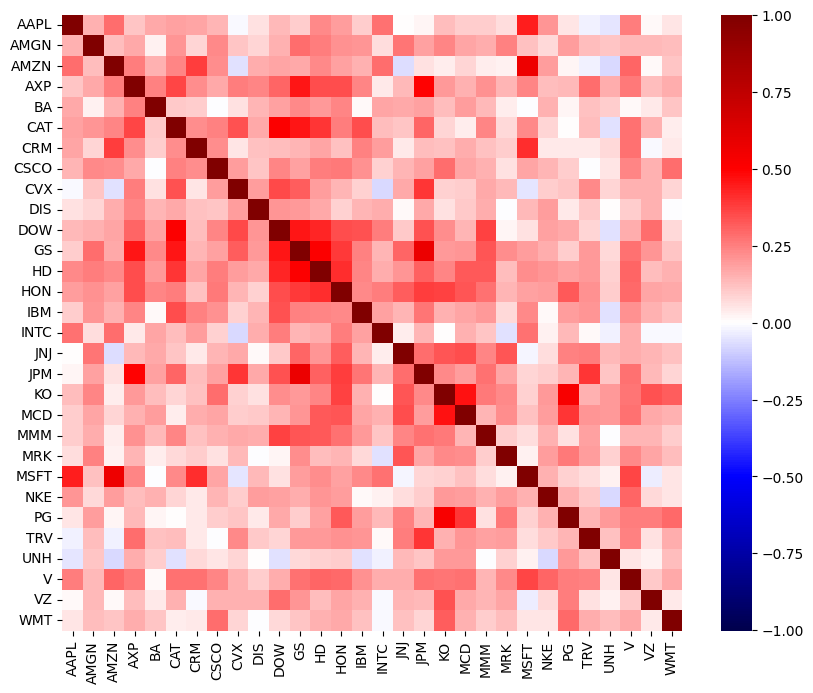

In [23]:
corr_matrix = pd.DataFrame(log_returns.corr())

# print(corr_matrix.to_numpy().min())

from matplotlib.colors import TwoSlopeNorm
fig = plt.figure(figsize=(10,8))  # Set aspect ratio
# Could also define ax, if needed for any formatting...
# ax = fig.add_subplot()
# ... or define both fig and ax as below
# fig, ax = plt.subplots(figsize=(10,8))

vmin = -1
vmax = 1
eps = 0.001
cmap = plt.cm.seismic
shifted = False
cmap_offset = 0.1

corr_plot = plot_correlations(corr_matrix, vmin, vmax, eps, cmap, shifted, cmap_offset)


8. Define Portfolio Performance Metrics

>> a. Standard Deviation

In [10]:
def standard_deviation (weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

>> b. Expected Return

In [11]:
# Assume: Expected returns are based on annualized historical returns
def expected_return (weights, log_returns):
    return np.sum(log_returns.mean() * weights) * 252


>> c. Sharpe Ratio

In [12]:
def sharpe_ratio (weights, cov_matrix, log_returns, risk_free_rate):
    effective_return = expected_return(weights, cov_matrix) - risk_free_rate
    risk_measure = standard_deviation(weights, log_returns)
    return effective_return / risk_measure

# Function to minimize using the scipy library (could also be an inverse of Sharpe ratio)
def neg_sharpe_ratio (weights, cov_matrix, log_returns, risk_free_rate):
    return -sharpe_ratio(weights, cov_matrix, log_returns, risk_free_rate)
    

9. Download Risk Free Rate

In [13]:
# 13-week Treasury Bill rate as of today
three_month_rate = yf.download(three_month_treasury_ticker, period='1d')['Adj Close'].values[0] / 100
# 10-year Treasury Note rate as of today
ten_year_rate = yf.download(ten_year_treasury_ticker, period='1d')['Adj Close'].values[0] / 100
# Take the risk free rate as the lower of the above two
risk_free_rate = min(three_month_rate, ten_year_rate)
print(f'{three_month_rate:.4f}, {ten_year_rate:.4f}')
print(f'{risk_free_rate:.4f}')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

0.0520, 0.0419
0.0419


In [14]:
n = len(tickers)
constraints = {
    'type': 'eq',
    'fun': lambda weights: np.sum(weights) - 1
}
bounds = [(0, 0.5) for _ in range(n)]
initial_weights = np.array([1 / n ] * n)

In [28]:
import warnings
warnings.filterwarnings("ignore", message="delta_grad == 0.0. Check if the approximated function is linear.")

AssertionError: category must be a class

In [27]:
# method = 'SLSQP'
# methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B', 'COBYLA', 'COBYQA', 'SLSQP', 'trust-constr', 'dogleg', 'trust-ncg', 'trust-exact', 'trust-krylov']
# methods = ['Nelder-Mead', 'Powell', 'CG', 'L-BFGS-B', 'SLSQP', 'trust-constr']
# methods = ['trust-constr', 'SLSQP']
methods = ['SLSQP']
for method in methods:
    optimized_results = minimize(
        neg_sharpe_ratio,
        initial_weights,
        args = (log_returns, cov_matrix, risk_free_rate),
        method = method,
        constraints = constraints,
        bounds = bounds
    )
    optimal_weights = optimized_results.x
    print(method)
    for tk, wt in zip(tickers, optimal_weights):
        total_log_return = log_returns[tk].sum()
        # if total_log_return > 0:
        if wt > 1e-6:
            # print(f'\t{tk}:\t{total_log_return:.6f}\t{wt:.6f}')
            print(f'\t{tk}:\t{wt:.6f}')
    optimal_portfolio_return = expected_return(optimal_weights, log_returns)
    optimal_portfolio_risk = standard_deviation(optimal_weights, cov_matrix)
    optimal_sharpe_ratio = sharpe_ratio(optimal_weights, log_returns, cov_matrix, risk_free_rate)
    print(f'\tOptimal Return:\t\t{optimal_portfolio_return:.6f}')
    print(f'\tRisk Free Rate:\t\t{risk_free_rate:.6f}')
    print(f'\tOptimal Risk:\t\t{optimal_portfolio_risk:.6f}')
    print(f'\tOptimal Sharpe Ratio:\t{optimal_sharpe_ratio:.6f}')


SLSQP
	AAPL:	0.014443
	AMGN:	0.098705
	AMZN:	0.063194
	GS:	0.087243
	IBM:	0.104097
	JPM:	0.160263
	MRK:	0.018837
	MSFT:	0.073923
	TRV:	0.067975
	VZ:	0.079132
	WMT:	0.232188
	Optimal Return:		0.331767
	Risk Free Rate:		0.041890
	Optimal Risk:		0.101641
	Optimal Sharpe Ratio:	2.851961


>>> The SLSQP method delivers a higher Sharpe Ratio than does the trust-constr method. The other methods fail on either the constraints or the bounds.

In [17]:
for tk in crypto_tickers:
    tk_desc = yf.Ticker(tk).info['description']
    tk_cmc_link = yf.Ticker(tk).info['coinMarketCapLink']
    print(f'Ticker: {tk}\nDescription: {tk_desc}\ncoinMarketCapLink: {tk_cmc_link}\n\n')

Ticker: BTC-USD
Description: Bitcoin (BTC) is a cryptocurrency launched in 2010. Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 19,720,284. The last known price of Bitcoin is 60,247.75677676 USD and is up 3.29 over the last 24 hours. It is currently trading on 11597 active market(s) with $21,726,458,550.23 traded over the last 24 hours. More information can be found at https://bitcoin.org/.
coinMarketCapLink: https://coinmarketcap.com/currencies/bitcoin


Ticker: ETH-USD
Description: Ethereum (ETH) is a cryptocurrency . Ethereum has a current supply of 120,215,726.06015156. The last known price of Ethereum is 3,214.26349575 USD and is up 2.04 over the last 24 hours. It is currently trading on 9132 active market(s) with $10,011,489,307.69 traded over the last 24 hours. More information can be found at https://www.ethereum.org/.
coinMarketCapLink: https://coinmarketcap.com/currencies/ethereum


Ticker: USDT-USD
Description: Tether USDt (USDT

In [18]:
tk = 'TSLA'
# tk_data = yf.download(tk, start=start_date, end=end_date)
tk_data = yf.download(tk)
print(len(tk_data))

tk_info = yf.Ticker(tk).info
vol_keys = ['averageVolume', 'averageVolume10days', 'averageDailyVolume10Day']
for key in vol_keys:
    print(f'{key}: {tk_info[key]}')

# The ave_vol variable refers to a prior period of 62 business days
ave_vol = tk_info['averageVolume'] 
print(f'ave_vol: {ave_vol}')

# The ave_vol_10d variable refers to a prior period of 10 business days
# It appears to have the same value as tk_info['averageDailyVolume10Day']
ave_vol_10d = tk_info['averageVolume10days'] 
print(f'ave_vol_10d: {ave_vol_10d}')

for j in range(2):
    j10 = j + 10
    tk_data_10mean = tk_data[-j10: -j]['Volume'].mean()
    if abs(tk_data_10mean / ave_vol_10d - 1) < 1e-6:
        print(tk_data_10mean)

n = len(tk_data)
for i in range(n):
    tk_data_mean = tk_data[-i: -1]['Volume'].mean()
    if abs(tk_data_mean / ave_vol - 1) < 1e-6:
        print(f"{i}:\t{tk_data_mean}")

[*********************100%%**********************]  1 of 1 completed


3533
averageVolume: 97453646
averageVolume10days: 158059170
averageDailyVolume10Day: 158059170
ave_vol: 97453646
ave_vol_10d: 158059170


In [19]:
df_adj_close_djia = pd.DataFrame()
tk = 'DJIA'
data_djia = yf.download(tk, start=start_date, end=end_date)
df_adj_close_djia[tk] = data_djia['Adj Close']
df_adj_close_djia = df_adj_close_djia.dropna()
print(df_adj_close_djia)

[*********************100%%**********************]  1 of 1 completed

                 DJIA
Date                 
2023-07-14  20.838472
2023-07-17  20.847839
2023-07-18  20.875938
2023-07-19  20.904030
2023-07-20  20.997688
...               ...
2024-07-08  22.290001
2024-07-09  22.280001
2024-07-10  22.275000
2024-07-11  22.330000
2024-07-12  22.430000

[251 rows x 1 columns]


In [20]:
log_returns_djia = pd.DataFrame(np.log(df_adj_close_djia / df_adj_close_djia.shift(1))).dropna()
print(log_returns_djia)

                DJIA
Date                
2023-07-17  0.000449
2023-07-18  0.001347
2023-07-19  0.001345
2023-07-20  0.004470
2023-07-21 -0.001339
...              ...
2024-07-08  0.002695
2024-07-09 -0.000449
2024-07-10 -0.000224
2024-07-11  0.002466
2024-07-12  0.004468

[250 rows x 1 columns]


In [21]:
st_dev_djia = np.sqrt(log_returns_djia.cov() * 252)
print(st_dev_djia)
expected_return_djia = np.sum(log_returns_djia.mean()) * 252
print(expected_return_djia)
eff_return_djia = expected_return_djia - risk_free_rate
sharpe_ratio_djia = eff_return_djia / st_dev_djia
print(sharpe_ratio_djia)

          DJIA
DJIA  0.073192
0.0741872385056979
          DJIA
DJIA  0.441269
